In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
df = pd.read_csv('D:/FinalProject/use_case_3/data/raw/skill_builder_dataset.csv', encoding='ISO-8859-1')

C:\Users\Dell\AppData\Local\Temp\ipykernel_10100\928584690.py:1: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/FinalProject/use_case_3/data/raw/skill_builder_dataset.csv', encoding='ISO-8859-1')


In [3]:
#  Drop Unnecessary Columns
drop_cols = ['user_id', 'problem_id', 'skill_name', 'answer_text', 'tutor_mode', 'type']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

In [4]:
#  Fill Missing Values
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10100\3511014092.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_10100\3511014092.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [ ]:
# Feature List
feature_columns = ['assistment_id', 'correct', 'attempt_count', 'ms_first_response',
                   'hint_count', 'overlap_time', 'template_id', 'answer_id',
                   'first_action', 'bottom_hint', 'opportunity']

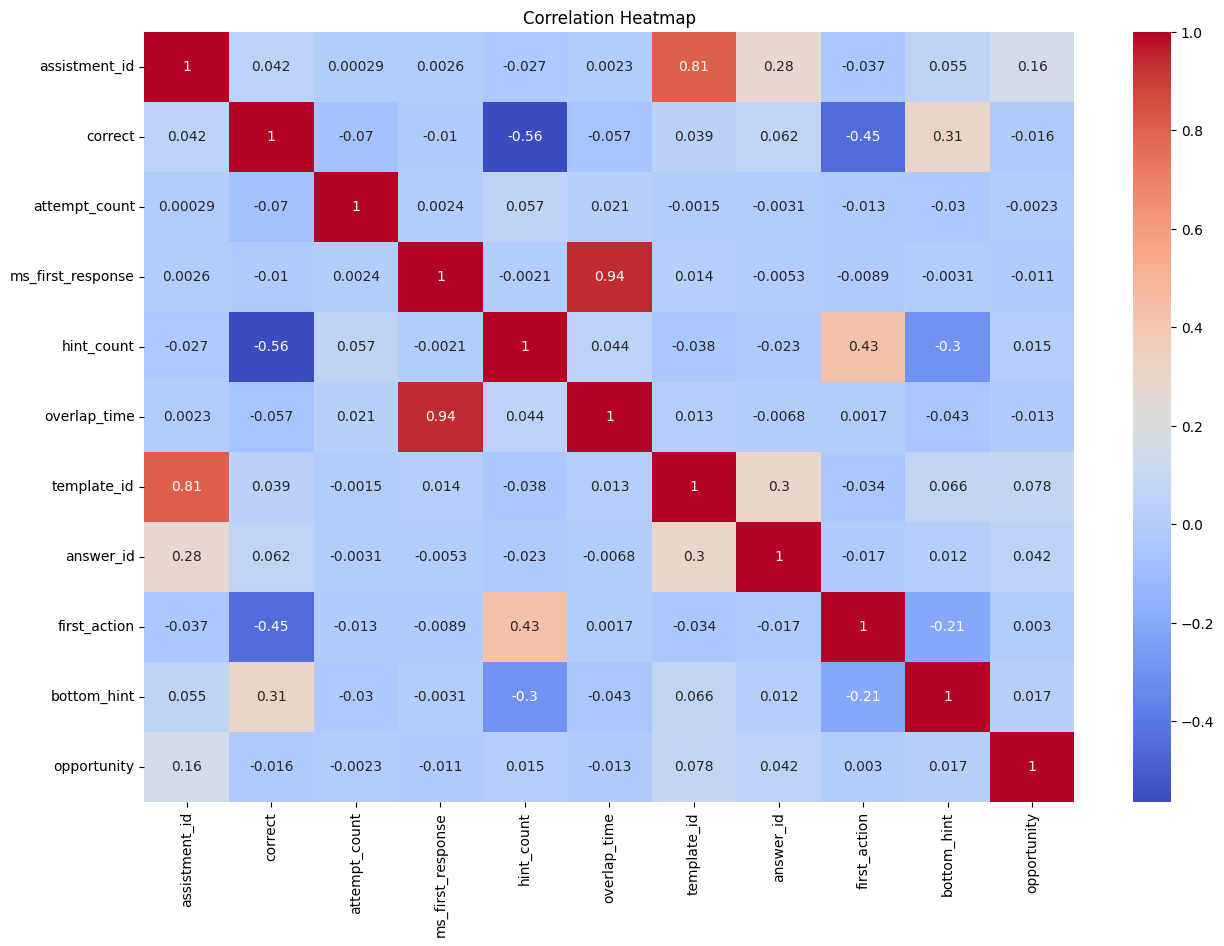

In [8]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df[feature_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('../eda/correlation_heatmap(preprocessing).png')
plt.show()

In [9]:
#  Scale the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_columns])

In [10]:
#  Save the Scaler
joblib.dump(scaler, '../model/scaler.pkl')

['../model/scaler.pkl']

In [11]:
#  Save the Processed Data
processed_df = pd.DataFrame(X_scaled, columns=feature_columns)
processed_df.to_csv('../data/processed/processed_data.csv', index=False)

print("Preprocessing complete. Processed data and scaler saved.")

Preprocessing complete. Processed data and scaler saved.
